In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()


from sklearn.neighbors import  KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [2]:

df_backup = pd.read_csv('boston_house_prices.csv')
df =  pd.read_csv('boston_house_prices.csv')
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.533202
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.196353
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
median_ = df['CRIM'].median()
median_


0.25651

In [6]:
df.loc[df['CRIM'] >= median_,['CRIM']] = 1
df.loc[df['CRIM']< median_,['CRIM']] = 0


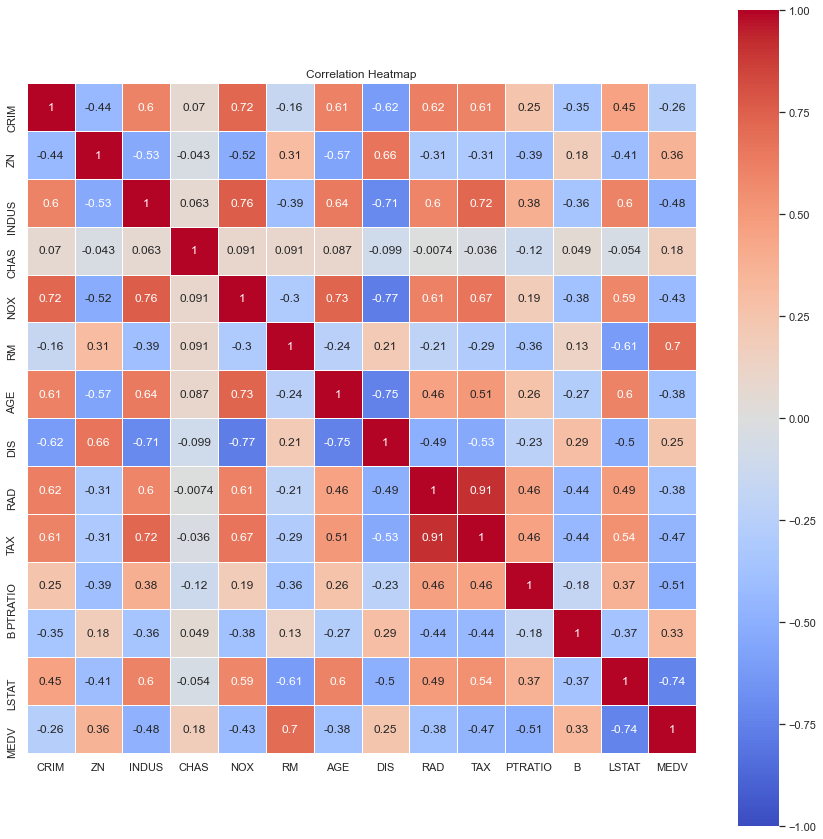

In [7]:
fig,ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(),annot=True, cmap= 'coolwarm', vmin=-1, vmax=1, center= 0,
            square=True, linewidths=1,ax = ax)
ax.set_title('Correlation Heatmap')
plt.show()

### All Features

In [8]:
features =  df.drop(columns=['CRIM'],axis=1)
scaler = StandardScaler()
scaler.fit(features)
scaled_features = scaler.transform(features)
X = pd.DataFrame(scaled_features,columns=features.columns)
y= df["CRIM"].astype(int)

In [9]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

### KNN

In [10]:
error_rate = []

for k in range(1,40):
  knn = KNeighborsRegressor(n_neighbors=k)
  knn.fit(X_train,y_train)
  pred_k = knn.predict(X_test)
  error_rate.append(np.sqrt(metrics.mean_squared_error(y_test,pred_k)))

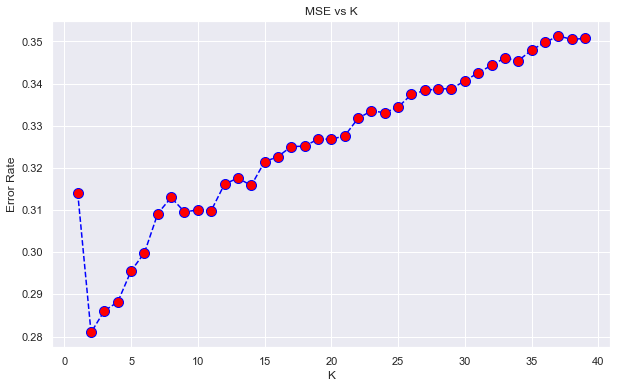

In [11]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',
         markersize=10)
plt.title('MSE vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [12]:
kreg = KNeighborsRegressor(n_neighbors=2)
kreg.fit(X_train,y_train)
preds = kreg.predict(X_test)
print("r2:",metrics.r2_score(y_test,preds))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,preds)))

r2: 0.6837177041789492
RMSE: 0.28097574347450816


In [13]:
preds = preds.astype(int)
preds

array([0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [14]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92        73
           1       0.99      0.85      0.91        79

    accuracy                           0.91       152
   macro avg       0.92      0.92      0.91       152
weighted avg       0.92      0.91      0.91       152



C:\Users\ersun\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


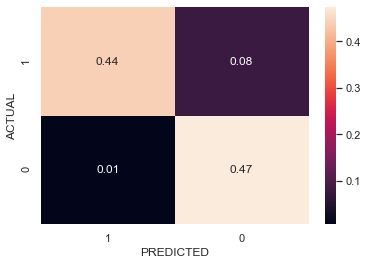

In [15]:
cm = confusion_matrix( y_test, preds, [1,0] )
sns.heatmap(cm/len(y_test), annot=True,  fmt='.2f', xticklabels = ["1", "0"] , 
                yticklabels = ["1", "0"] )
plt.ylabel('ACTUAL')
plt.xlabel('PREDICTED')
plt.show()

### LOGISTIC REGRESSION

In [16]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [17]:
logmodel.coef_

array([[-0.89295306, -0.37601156,  0.16226938,  3.00379469,  0.24416856,
         0.23584708,  0.38071047,  2.01149508, -0.32241755,  0.33124798,
        -0.69320726,  0.63653428,  0.74212036]])

In [18]:
logmodel.intercept_

array([0.75831859])

In [19]:
predictions = logmodel_all.predict(X_test)

NameError: name 'logmodel_all' is not defined

In [120]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89        73
           1       0.97      0.81      0.88        79

    accuracy                           0.89       152
   macro avg       0.90      0.89      0.89       152
weighted avg       0.90      0.89      0.89       152



C:\Users\ersun\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


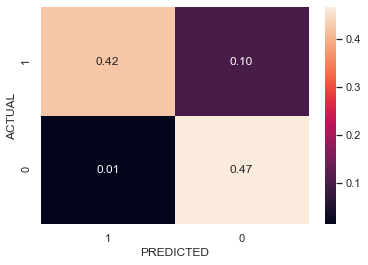

In [121]:
cm = confusion_matrix( y_test, predictions, [1,0] )
sns.heatmap(cm/len(y_test), annot=True,  fmt='.2f', xticklabels = ["1", "0"] , 
                yticklabels = ["1", "0"] )
plt.ylabel('ACTUAL')
plt.xlabel('PREDICTED')
plt.show()

With all features:
accuracy in KNN = 91%
accuracy in Log. Reg = 89%

### Using Some Features

In [98]:
df[[ 'INDUS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX']]

,INDUS,NOX,AGE,DIS,RAD,TAX
0,2.31,0.538,65.2,4.0900,1,296
1,7.07,0.469,78.9,4.9671,2,242
2,7.07,0.469,61.1,4.9671,2,242
3,2.18,0.458,45.8,6.0622,3,222
4,2.18,0.458,54.2,6.0622,3,222
...,...,...,...,...,...,...
501,11.93,0.573,69.1,2.4786,1,273
502,11.93,0.573,76.7,2.2875,1,273
503,11.93,0.573,91.0,2.1675,1,273
504,11.93,0.573,89.3,2.3889,1,273


In [123]:
X_train2 = X_train[['INDUS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX']]
X_test2 = X_test[['INDUS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX']]
y_train2 = y_train
y_test2 = y_test


In [130]:
y_train2

204    0
370    1
485    1
86     0
241    0
      ..
63     0
326    1
337    0
11     0
351    0
Name: CRIM, Length: 354, dtype: int32

### KNN

In [135]:
error_rate2 = []

for k in range(1,40):
  knn = KNeighborsRegressor(n_neighbors=k)
  knn.fit(X_train2,y_train2)
  pred_k2 = knn.predict(X_test2)
  error_rate2.append(np.sqrt(metrics.mean_squared_error(y_test2,pred_k2)))



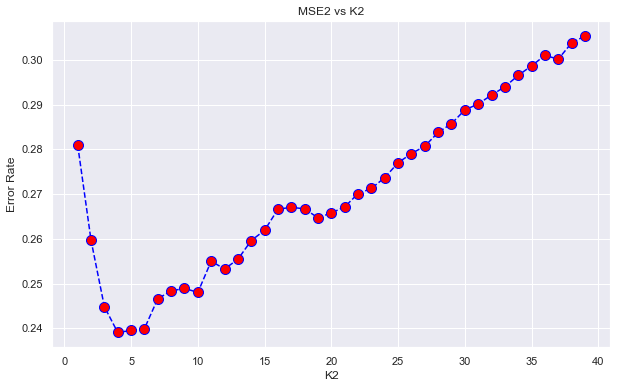

In [137]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate2,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',
         markersize=10)
plt.title('MSE2 vs K2')
plt.xlabel('K2')
plt.ylabel('Error Rate')
plt.show()


In [138]:
kreg = KNeighborsRegressor(n_neighbors=4)
kreg.fit(X_train2,y_train2)
preds2 = kreg.predict(X_test2)
print("r2:",metrics.r2_score(y_test2,preds2))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test2,preds2)))


r2: 0.7710247962545518
RMSE: 0.23907029356061346


In [140]:
preds2 = preds2.astype(int)
preds2


array([0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [141]:
print(classification_report(y_test2,preds2))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92        73
           1       0.99      0.85      0.91        79

    accuracy                           0.91       152
   macro avg       0.92      0.92      0.91       152
weighted avg       0.92      0.91      0.91       152



C:\Users\ersun\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


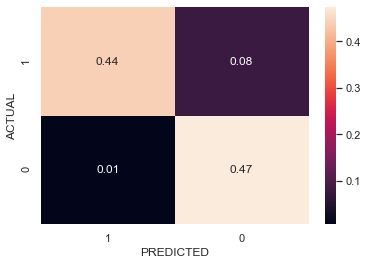

In [142]:
cm = confusion_matrix( y_test2, preds2, [1,0] )
sns.heatmap(cm/len(y_test2), annot=True,  fmt='.2f', xticklabels = ["1", "0"] , 
                yticklabels = ["1", "0"] )
plt.ylabel('ACTUAL')
plt.xlabel('PREDICTED')
plt.show()


### Logistic Regression

In [143]:
logmodel2 = LogisticRegression()
logmodel2.fit(X_train2,y_train2)


LogisticRegression()

In [144]:
logmodel2.coef_

array([[-0.27548457,  2.72284523,  0.44626309, -0.0116481 ,  2.1918584 ,
        -0.46093153]])

In [145]:
logmodel2.intercept_

array([0.77113615])

In [146]:
predictions2 = logmodel2.predict(X_test2)

In [147]:
print(classification_report(y_test2,predictions2))

              precision    recall  f1-score   support

           0       0.74      0.99      0.85        73
           1       0.98      0.68      0.81        79

    accuracy                           0.83       152
   macro avg       0.86      0.83      0.83       152
weighted avg       0.87      0.83      0.83       152



C:\Users\ersun\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


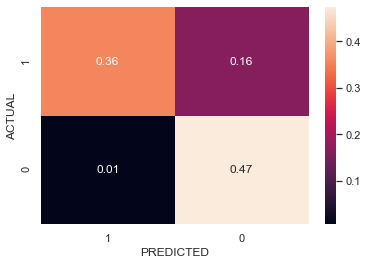

In [148]:
cm = confusion_matrix( y_test2, predictions2, [1,0] )
sns.heatmap(cm/len(y_test2), annot=True,  fmt='.2f', xticklabels = ["1", "0"] , 
                yticklabels = ["1", "0"] )
plt.ylabel('ACTUAL')
plt.xlabel('PREDICTED')
plt.show()


With some of the features:

accuracy in KNN = 91%

accuracy in Log. Reg = 83%

As result, KNN model is better